<a href="https://colab.research.google.com/github/HafsaHameed457/Heart_Failure_Preditcion/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [129]:
data = pd.read_csv("/content/heart.csv")
data.head().T
labels=list(data.columns)

In [82]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [83]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [84]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [85]:
#Checking for null values:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [86]:
# Seperating object and data coloumns
objcol = []
numcol = []
for i in data.columns:
    if (data[i].dtype == 'object'):
        objcol.append(i)
    else:
        numcol.append(i)

In [87]:
objcol

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [88]:
numcol

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [89]:
for i in objcol:
    data[i] = le.fit_transform(data[i])
    print(i,le.classes_)

Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
RestingECG ['LVH' 'Normal' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Down' 'Flat' 'Up']


In [90]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,40.0,49.0,37.0,48.0,54.0,39.0,45.0,54.0,37.0,48.0
Sex,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
ChestPainType,1.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0
RestingBP,140.0,160.0,130.0,138.0,150.0,120.0,130.0,110.0,140.0,120.0
Cholesterol,289.0,180.0,283.0,214.0,195.0,339.0,237.0,208.0,207.0,284.0
FastingBS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0,170.0,170.0,142.0,130.0,120.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0


In [92]:
heart=data['HeartDisease']
targetdata = data.drop('HeartDisease',axis = 'columns')
targetdata.head().T

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
Sex,1.0,0.0,1.0,0.0,1.0
ChestPainType,1.0,2.0,1.0,0.0,2.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [133]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(targetdata)
data_scaled = pd.DataFrame(data_scaled, columns=targetdata.columns)

Text(0.5, 1.0, 'Correlation Heatmap')

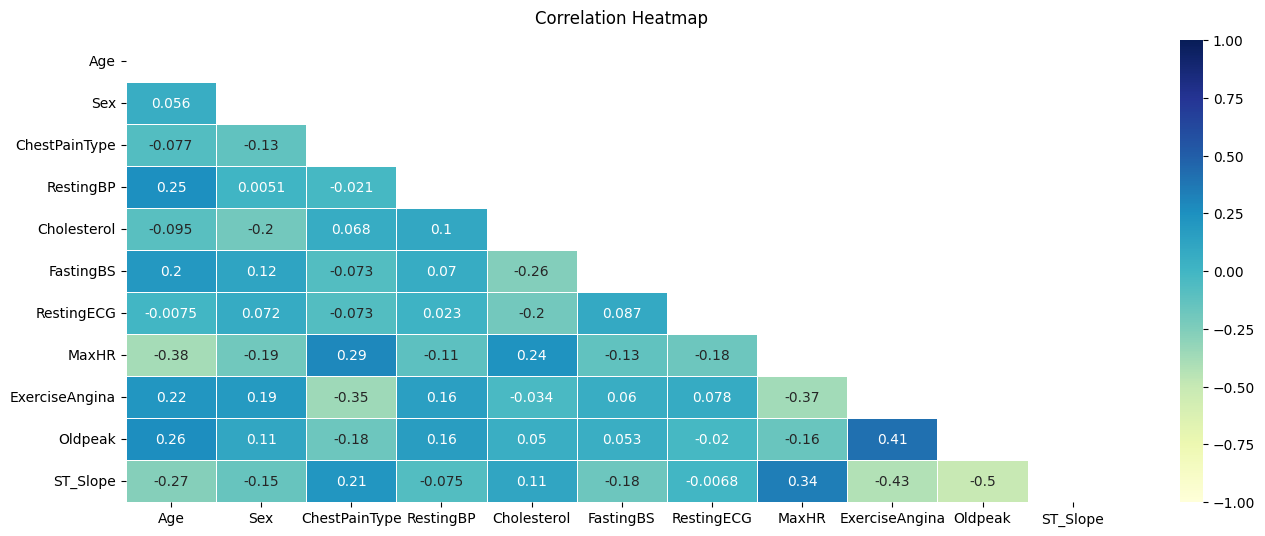

In [134]:
# Correlation
corr = data_scaled.corr()
plt.figure(figsize=(16,6))
mask =np.triu(np.ones_like(corr, dtype=bool))
heatmap=sns.heatmap(corr,mask=mask,cmap='YlGnBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [135]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop);

[]


In [136]:
data_scaled


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


In [144]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [148]:
x = targetdata
y = heart

In [149]:
model_rf = RandomForestClassifier(max_depth = 5)
rfe = RFE(model_rf)

rfe.fit(x,y)

print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))

Num Features: 5
Selected Features: [False False  True False False False False  True  True  True  True]


In [150]:
x_selected = x.iloc[:,rfe.support_]
x_selected.head()

,ChestPainType,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1,172,0,0.0,2
1,2,156,0,1.0,1
2,1,98,0,0.0,2
3,0,108,1,1.5,1
4,2,122,0,0.0,2


In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_selected,y, test_size=0.2, random_state = 42)

In [152]:
model = RandomForestClassifier(max_depth = 5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1= f1_score(y_pred, y_test)

print('Accuracy is :', accuracy)
print('Precision is :', precision)
print('Recall is :', recall)
print('F1 Score is :', f1)

Accuracy is : 0.8315217391304348
Precision is : 0.8037383177570093
Recall is : 0.8958333333333334
F1 Score is : 0.8472906403940886
